# project proposal

Proposal questions:
1.	The objective of this problem is to be able to predict whether a water pump is functional, functional with need of repair, or non-functional using the Taarifa and Tanzanian Ministry of Water datasets.
2.	The solution will be used to focus on certain aspects regarding the pumps to maximize the amount of functional pumps in Tanzania at a given time.
3.	The current solution is to just fix the pumps as they break.
4.	 I should frame this problem by trying to build a model based on the feature variables that have the biggest influence on whether a pump is functional, functional with need of repair, or non-functional.
5.	Today I had a discussion with Dr. Tumlison regarding my dataset.  Some of the main feature variables we had a discussion on were the extraction_type and the source_type.  Dr. Tumlison and I discussed how there is a good chance that the extraction type used is correlated with the type of water source in some fashion (see correlation heatmap below).
6.	Funder, installer, and amount_tsh look very interesting to me for predicting the functionality of the pumps.  It appears that none of these feature variables are highly correlated with each other (see correlation heatmap below), so overfitting due to highly correlated feature variables would not be a problem when using these three variables.  Funder and installer are both inbalanced (see code section below), so actions will need to be taken in order to balance the classes to prevent overfitting.  I believe this is part of the reason why overfitting is occuring in my current decision tree classifier model.

(Data accessed on 10/1/2019 from driven data competion site)

[DrivenData water pump data download site](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/)


| variable          | description                                              |
|-------------------|----------------------------------------------------------|
| amount_tsh        | Total static head (amount water available to waterpoint) |
| date_recorded     | The date the row was entered                             |
| funder            | Who funded the well                                      |
| gps_height        | Altitude of the well                                     |
| installer         | Organization that installed the well                     |
| longitude         | GPS coordinate                                           |
| latitude          | GPS coordinate                                           |
| wpt_name          | Name of the waterpoint if there is one                   |
| basin             | Geographic water basin                                   |
| subvillage        | Subvillage geographic location                           |
| region            | Region geographic location                               |
| region_code       | Region geographic location (coded)                       |
| population        | Population around the well                               |
| public_meeting    | True/False                                               |
| scheme_management | Who operates the waterpoint                              |
| scheme_name       | Who operates the waterpoint                              |
| permit            | If the waterpoint is permitted                           |
| extraction_type   | The kind of extraction the waterpoint uses               |
| management        | How the waterpoint is managed                            |
| payment           | What the water costs                                     |
| water_quality     | The quality of the water                                 |
| quantity          | The quantity of water                                    |
| source_type            | The source of the water                                  |


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

np.random.seed(42)

In [0]:
X_train = pd.read_csv('X_train.csv', delimiter=',')
y_train = pd.read_csv('y_train.csv', delimiter=',')
X_test = pd.read_csv('X_test.csv', delimiter=',')
to_drop = ["id","date_recorded","wpt_name","recorded_by","num_private","region","longitude","latitude","subvillage","lga","ward","scheme_name","extraction_type_class","extraction_type_group","management_group","payment","quantity","water_quality", "source","source_class","waterpoint_type","waterpoint_type_group",]
water_pump = pd.merge(X_train, y_train, on='id')
water_pump_remove_na = water_pump.dropna(subset=['funder', 'installer','public_meeting', 'scheme_management'])
target_vector_class = water_pump['status_group']
target_vector_reg = water_pump['amount_tsh']

In [0]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118800 entries, 0 to 59399
Data columns (total 41 columns):
amount_tsh               59400 non-null float64
basin                    59400 non-null object
construction_year        59400 non-null float64
date_recorded            59400 non-null object
district_code            59400 non-null float64
extraction_type          59400 non-null object
extraction_type_class    59400 non-null object
extraction_type_group    59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null float64
id                       118800 non-null int64
installer                55745 non-null object
latitude                 59400 non-null float64
lga                      59400 non-null object
longitude                59400 non-null float64
management               59400 non-null object
management_group         59400 non-null object
num_private              59400 non-null float64
payment                  59400 non-nu

In [0]:
water_pump.isnull().sum()

amount_tsh               59400
basin                    59400
construction_year        59400
date_recorded            59400
district_code            59400
extraction_type          59400
extraction_type_class    59400
extraction_type_group    59400
funder                   63035
gps_height               59400
id                           0
installer                63055
latitude                 59400
lga                      59400
longitude                59400
management               59400
management_group         59400
num_private              59400
payment                  59400
payment_type             59400
permit                   62456
population               59400
public_meeting           62734
quality_group            59400
quantity                 59400
quantity_group           59400
recorded_by              59400
region                   59400
region_code              59400
scheme_management        63277
scheme_name              87566
source                   59400
source_c

In [0]:
water_pump.dropna(subset=['funder', 'installer', 'longitude', 'latitude'],inplace=True)

In [0]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 41 columns):
amount_tsh               0 non-null float64
basin                    0 non-null object
construction_year        0 non-null float64
date_recorded            0 non-null object
district_code            0 non-null float64
extraction_type          0 non-null object
extraction_type_class    0 non-null object
extraction_type_group    0 non-null object
funder                   0 non-null object
gps_height               0 non-null float64
id                       0 non-null int64
installer                0 non-null object
latitude                 0 non-null float64
lga                      0 non-null object
longitude                0 non-null float64
management               0 non-null object
management_group         0 non-null object
num_private              0 non-null float64
payment                  0 non-null object
payment_type             0 non-null object
permit                   0 non-null objec

In [0]:
water_pump_drop_na.info()

AttributeError: ignored

In [0]:
X_train = water_pump.drop(['id', 'status_group',],axis=1)
y_train = water_pump['status_group']

In [0]:
water_pump.shape

(59400, 41)

In [0]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48651 entries, 0 to 59399
Data columns (total 20 columns):
amount_tsh           48651 non-null float64
basin                48651 non-null object
construction_year    48651 non-null float64
district_code        48651 non-null float64
extraction_type      48651 non-null object
funder               48651 non-null object
gps_height           48651 non-null float64
id                   0 non-null float64
installer            48651 non-null object
management           48651 non-null object
payment_type         48651 non-null object
permit               48651 non-null object
population           48651 non-null float64
public_meeting       48651 non-null object
quality_group        48651 non-null object
quantity_group       48651 non-null object
region_code          48651 non-null float64
scheme_management    48651 non-null object
source_type          48651 non-null object
status_group         0 non-null object
dtypes: float64(7), object(13)
m

In [0]:
water_pump['funder'].value_counts(normalize=True)

Government Of Tanzania          0.162898
Danida                          0.055841
Hesawa                          0.039487
Rwssp                           0.024639
World Bank                      0.024191
                                  ...   
Mzungu                          0.000018
Theo                            0.000018
Tasae                           0.000018
Diocese Of Mount Kilimanjaro    0.000018
Padep(mifugo)                   0.000018
Name: funder, Length: 1897, dtype: float64

In [0]:
water_pump['installer'].value_counts(normalize=True)

DWE                      0.312171
Government               0.032738
RWE                      0.021634
Commu                    0.019015
DANIDA                   0.018836
                           ...   
kw                       0.000018
REGWA                    0.000018
Rotary club Australia    0.000018
OLOMOLOKI                0.000018
Hasawa                   0.000018
Name: installer, Length: 2145, dtype: float64

In [0]:
water_pump.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit



split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(water_pump_remove_na[['funder', 'installer', 'longitude', 'latitude']], water_pump_remove_na['status_group']):
    strat_train_set = water_pump_remove_na.loc[train_index]
    strat_test_set = water_pump_remove_na.loc[test_index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [0]:
strat_train_set['funder'].value_counts()
#X_test.shape

Government Of Tanzania       5432
Danida                       1916
Hesawa                        982
Kkkt                          848
World Bank                    794
                             ... 
Mwita                           1
Dar Es Salaam Round Table       1
Kcu                             1
Yasi Naini                      1
Kkkt Ndrumangeni                1
Name: funder, Length: 1321, dtype: int64

In [0]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18414 entries, 3663 to 7532
Data columns (total 41 columns):
id                       18414 non-null float64
amount_tsh               18414 non-null float64
date_recorded            18414 non-null object
funder                   18414 non-null int64
gps_height               18414 non-null float64
installer                18414 non-null int64
longitude                18414 non-null float64
latitude                 18414 non-null float64
wpt_name                 18414 non-null object
num_private              18414 non-null float64
basin                    18414 non-null object
subvillage               18414 non-null object
region                   18414 non-null object
region_code              18414 non-null float64
district_code            18414 non-null float64
lga                      18414 non-null object
ward                     18414 non-null object
population               18414 non-null float64
public_meeting           18414 non-n

In [0]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18414 entries, 3663 to 7532
Data columns (total 41 columns):
id                       18414 non-null float64
amount_tsh               18414 non-null float64
date_recorded            18414 non-null object
funder                   18414 non-null int64
gps_height               18414 non-null float64
installer                18414 non-null int64
longitude                18414 non-null float64
latitude                 18414 non-null float64
wpt_name                 18414 non-null object
num_private              18414 non-null float64
basin                    18414 non-null object
subvillage               18414 non-null object
region                   18414 non-null object
region_code              18414 non-null float64
district_code            18414 non-null float64
lga                      18414 non-null object
ward                     18414 non-null object
population               18414 non-null float64
public_meeting           18414 non-n

In [0]:
vc_viz = ValidationCurve(DecisionTreeClassifier(),
                        param_name="max_depth",
                        param_range=np.arange(1,11),
                        cv=10,
                        n_jobs=-1)

vc_viz.fit(X,y)
vc_viz.poof();

In [0]:
strat_test_set["funder"].value_counts() / len(strat_test_set)

Government Of Tanzania     0.134181
Danida                     0.048220
Hesawa                     0.026551
Kkkt                       0.022279
World Bank                 0.021668
                             ...   
Maswi Drilling Co. Ltd     0.000102
Henure Dema                0.000102
Hesawz                     0.000102
Magadini Makiwaru Water    0.000102
Wrssp                      0.000102
Name: funder, Length: 718, dtype: float64

In [0]:
water_pump_remove_na["funder"].value_counts() / len(water_pump_remove_na)

Government Of Tanzania    0.166500
Danida                    0.059434
Hesawa                    0.031314
Kkkt                      0.025719
World Bank                0.024294
                            ...   
Wdsp                      0.000020
Lg                        0.000020
Da Unoperaio Siciliano    0.000020
Mzee Mkungata             0.000020
Mkuluku                   0.000020
Name: funder, Length: 1616, dtype: float64

In [0]:
strat_test_set["installer"].value_counts() / len(strat_test_set)

148    0.300098
529    0.030520
109    0.029543
220    0.028076
68     0.022429
         ...   
185    0.000054
201    0.000054
233    0.000054
249    0.000054
727    0.000054
Name: installer, Length: 763, dtype: float64

In [0]:
water_pump_remove_na["installer"].value_counts() / len(water_pump_remove_na)

DWE               0.299204
Government        0.029931
Commu             0.021548
RWE               0.021039
KKKT              0.018048
                    ...   
Private owned     0.000020
BAPTIST CHURCH    0.000020
Others            0.000020
Grumeti fund      0.000020
Fabia             0.000020
Name: installer, Length: 1848, dtype: float64

In [0]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=17)

lab = preprocessing.LabelEncoder()
strat_train_set = strat_train_set.dropna(how='any')
strat_test_set = strat_train_set.dropna(how='any')
strat_train_set['funder'] = lab.fit_transform(strat_train_set['funder'])
strat_train_set['installer']=lab.fit_transform(strat_train_set['installer'])
strat_train_set['extraction_type']=lab.fit_transform(strat_train_set['extraction_type'])
strat_train_set['source_type']=lab.fit_transform(strat_train_set['source_type'])
strat_test_set['funder'] = lab.fit_transform(strat_test_set['funder'])
strat_test_set['installer'] = lab.fit_transform(strat_test_set['installer'])
y_test1 = lab.fit_transform(strat_test_set['status_group'])
y_train1 = lab.fit_transform(strat_train_set['status_group'])
X_train1 = strat_train_set[['funder', 'installer', 'longitude', 'latitude']]
X_test1 = strat_test_set[['funder', 'installer', 'longitude', 'latitude']]
dt.fit(X_train1, y_train1)
dt.score(X_test1, y_test1)

0.867274899532964

In [0]:
pd.get_dummies(strat_train_set[['funder', 'installer', 'longitude', 'latitude']], drop_first=True).head()

,longitude,latitude,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abood,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acra,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_Afdp,funder_Africa,funder_Africa 2000 Network/undp,funder_Africa Amini Alama,funder_African,funder_African 2000 Network,funder_African Barrick Gold,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Afriican Reli,...,installer_ir,installer_is,installer_kanisa,installer_kuwait,installer_kw,installer_lion's club,installer_local technician,installer_local fundi,installer_local technical tec,installer_local technician,installer_local technitian,installer_lusajo,installer_lutheran church,installer_morovian church,installer_ms,installer_mwakalinga,installer_mwita,installer_mwita kichere,installer_nandra Construction,installer_nchagwa,installer_not known,installer_plan int,installer_private,installer_rc church,installer_salamu kita,installer_secondary,installer_secondary school,installer_sengerema Water Department,installer_shule,installer_stansilaus,installer_upper Ruvu,installer_villager,installer_villagers,installer_villigers,installer_wanan,installer_wananchi,installer_wasab,installer_water board,installer_world,installer_world banks
3663,34.902651,-11.366890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46482,35.431369,-7.995626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48098,29.930444,-4.810484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18180,39.124125,-7.453957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22759,36.316508,-6.103004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
rt = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=17)
rt.fit(X_train1,y_train1)
rt.score(X_test1,y_test1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9304876724231563

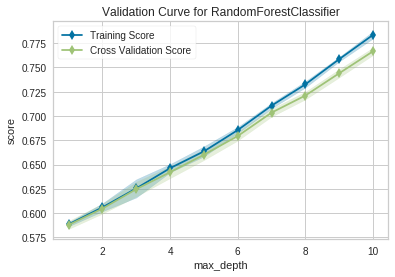

In [0]:
X_tr = pd.DataFrame(X_train1, columns=['funder', 'installer', 'longitude', 'latitude'])
X_te = pd.DataFrame(X_test1, columns=['funder', 'installer', 'longitude', 'latitude'])
y_tr = pd.Series(y_train1, name='status_group')
y_te = pd.Series(y_test1, name='status_group')

X = pd.concat([X_tr, X_te])
y= pd.concat([y_tr, y_te])


vc_viz = ValidationCurve(RandomForestClassifier(),
                        param_name="max_depth",
                        param_range=np.arange(1,11),
                        cv=10,
                    
                        n_jobs=-1)

vc_viz.fit(X,y)
vc_viz.poof();

In [0]:
strat_train_set[['funder', 'installer', 'longitude', 'latitude', 'extraction_type', 'source_type']].corr()

,funder,installer,longitude,latitude,extraction_type,source_type
funder,1.000000,0.515028,-0.022603,0.006436,0.070582,-0.138885
installer,0.515028,1.000000,-0.036853,0.055857,0.141499,-0.106956
longitude,-0.022603,-0.036853,1.000000,-0.263222,0.056100,0.046961
latitude,0.006436,0.055857,-0.263222,1.000000,-0.016165,0.084724
extraction_type,0.070582,0.141499,0.056100,-0.016165,1.000000,-0.624990
source_type,-0.138885,-0.106956,0.046961,0.084724,-0.624990,1.000000


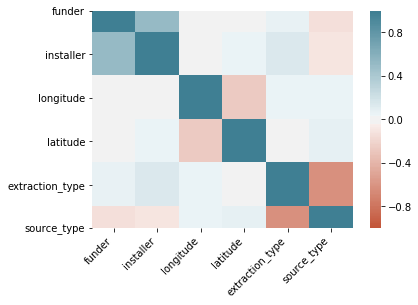

In [0]:
corr = strat_train_set[['funder', 'installer', 'longitude', 'latitude', 'extraction_type', 'source_type']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:


param_grid = {'max_depth': np.linspace(1,20,6)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=7)
grid.fit(X_train1,y_train1)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. ])},
             pre_dispatch='2*n_jobs', refit=True, re

In [0]:
grid.best_params_

{'max_depth': 16.2}